## 3. Feature 2차 전처리 
### 3-1. 다시 패키지와 데이터 불러오기 

In [38]:
# 패키지 import 
import pandas as pd
import numpy as np

# 그래프 관련 패키지 import 
import matplotlib.pyplot as plt  # mpatplotlib.pyplot
%matplotlib inline
from matplotlib.gridspec import GridSpec
import matplotlib.dates as mdates #  그래프의 원하는 날짜 형식으로 포멧 셋팅 Matplotlib.dates
import matplotlib.animation as animation # 그래프 애니메이션 효과 셋팅 Matplotlib.animation
import missingno as msno # 결측치 그래프 확인 missingno 패키지

import seaborn as sns
sns.set_style('darkgrid') # seaborn 그래프 background 회색으로 설정 
sns.set_context('talk') # 컨텍스트 매개 변수를 변경 플롯의 레이블에 대한 기본 글꼴 크기를 제어하는데 사용
sns.set(font_scale = 1)

import plotly.express as px # plotly.express
import plotly.io as pio # plotly 라이브러리를 표기하기 위해 추가한 코드 
pio.renderers.default = "notebook_connected"


# 모델링 관련 패키지 import 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import warnings   # 버전 충돌로 나오는 경고 표시를 표시하지 않게 설정 
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc   
# plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
plt.rcParams['font.family'] = 'AppleGothic'  # (MAC, 리눅스 용)
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 사전 전처리 한 데이터 불러오기 
df_db_v2 = pd.read_csv('data/moduparkingDB.csv')
df_db_v2

,USER_ID,JOIN_DATE,JOIN_YEAR,JOIN_MONTH,JOIN_DAY,D_TYPE,STORE_ID,GOODS_TYPE,DATE,PAY_YEAR,PAY_MONTH,PAY_DAY,WEEKDAY,COUNT,AD1
0,2858,2014-01-07,2014,1,7,AA,1892,A,2020-01-01,2020,1,1,Wed,1,GN
1,5647,2014-02-14,2014,2,14,BB,182009,A,2020-01-01,2020,1,1,Wed,1,J
2,33314,2014-11-20,2014,11,20,BB,82431,A,2020-01-01,2020,1,1,Wed,1,SC
3,37001,2014-12-04,2014,12,4,BB,725,C,2020-01-01,2020,1,1,Wed,1,MP
4,37819,2014-12-07,2014,12,7,AA,220691,C,2020-01-01,2020,1,1,Wed,1,JRR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,2020,12,31,BB,219886,B,2020-12-31,2020,12,31,Thu,1,GN
879267,1830570,2020-12-31,2020,12,31,BB,82433,B,2020-12-31,2020,12,31,Thu,1,CY
879268,1830580,2020-12-31,2020,12,31,AA,92020,B,2020-12-31,2020,12,31,Thu,1,JRR
879269,1830589,2020-12-31,2020,12,31,BB,92437,B,2020-12-31,2020,12,31,Thu,1,J


In [3]:
# Date를 Datetime으로 년, 월, 일로 나눠진 문자열 데이터를 숫자형으로 변환
df_db_v2.JOIN_DATE = pd.to_datetime(df_db_v2.JOIN_DATE)
df_db_v2.JOIN_YEAR = pd.to_numeric(df_db_v2.JOIN_YEAR)
df_db_v2.JOIN_MONTH = pd.to_numeric(df_db_v2.JOIN_MONTH)
df_db_v2.JOIN_DAY = pd.to_numeric(df_db_v2.JOIN_DAY)
df_db_v2.DATE = pd.to_datetime(df_db_v2.DATE)
df_db_v2.PAY_YEAR = pd.to_numeric(df_db_v2.PAY_YEAR)
df_db_v2.PAY_MONTH = pd.to_numeric(df_db_v2.PAY_MONTH)
df_db_v2.PAY_DAY = pd.to_numeric(df_db_v2.PAY_DAY)

In [4]:
df_db_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   USER_ID     879271 non-null  int64         
 1   JOIN_DATE   879271 non-null  datetime64[ns]
 2   JOIN_YEAR   879271 non-null  int64         
 3   JOIN_MONTH  879271 non-null  int64         
 4   JOIN_DAY    879271 non-null  int64         
 5   D_TYPE      879271 non-null  object        
 6   STORE_ID    879271 non-null  int64         
 7   GOODS_TYPE  879271 non-null  object        
 8   DATE        879271 non-null  datetime64[ns]
 9   PAY_YEAR    879271 non-null  int64         
 10  PAY_MONTH   879271 non-null  int64         
 11  PAY_DAY     879271 non-null  int64         
 12  WEEKDAY     879271 non-null  object        
 13  COUNT       879271 non-null  int64         
 14  AD1         879271 non-null  object        
dtypes: datetime64[ns](2), int64(9), object(4)
memory us

### 3-2. Feature Engineering을 위한 전처리 

#### 1. 가입일 1970년도 데이터 제거 

In [5]:
df_db_v2[df_db_v2['JOIN_YEAR']==1970]

,USER_ID,JOIN_DATE,JOIN_YEAR,JOIN_MONTH,JOIN_DAY,D_TYPE,STORE_ID,GOODS_TYPE,DATE,PAY_YEAR,PAY_MONTH,PAY_DAY,WEEKDAY,COUNT,AD1
437,1081430,1970-01-01,1970,1,1,CC,90070,A,2020-01-01,2020,1,1,Wed,1,GD
2196,1410151,1970-01-01,1970,1,1,CC,92437,B,2020-01-02,2020,1,2,Thu,1,J
2204,1415023,1970-01-01,1970,1,1,CC,131081,A,2020-01-02,2020,1,2,Thu,1,YO
2434,125582,1970-01-01,1970,1,1,CC,91885,A,2020-01-03,2020,1,3,Fri,1,YD
2645,602188,1970-01-01,1970,1,1,CC,2334,B,2020-01-03,2020,1,3,Fri,1,MP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866536,1723400,1970-01-01,1970,1,1,CC,190188,A,2020-12-26,2020,12,26,Sat,1,JR
867913,1723400,1970-01-01,1970,1,1,CC,190188,A,2020-12-27,2020,12,27,Sun,1,JR
868210,1825656,1970-01-01,1970,1,1,CC,219936,A,2020-12-27,2020,12,27,Sun,1,YD
873707,1828010,1970-01-01,1970,1,1,CC,220635,C,2020-12-29,2020,12,29,Tue,1,GN


In [6]:
# 가입일 1970년도를 제거
df_db_v2 = df_db_v2[df_db_v2.JOIN_YEAR != 1970]

#### 2. User ID 999665 데이터 제거

In [7]:
df_db_v2[df_db_v2['USER_ID']==999665]

,USER_ID,JOIN_DATE,JOIN_YEAR,JOIN_MONTH,JOIN_DAY,D_TYPE,STORE_ID,GOODS_TYPE,DATE,PAY_YEAR,PAY_MONTH,PAY_DAY,WEEKDAY,COUNT,AD1
372,999665,2018-12-16,2018,12,16,CC,82399,A,2020-01-01,2020,1,1,Wed,6,JRR
1527,999665,2018-12-16,2018,12,16,CC,104988,A,2020-01-02,2020,1,2,Thu,11,GN
3121,999665,2018-12-16,2018,12,16,CC,181832,A,2020-01-03,2020,1,3,Fri,7,SC
5034,999665,2018-12-16,2018,12,16,CC,109223,A,2020-01-04,2020,1,4,Sat,28,MP
6919,999665,2018-12-16,2018,12,16,CC,104916,A,2020-01-05,2020,1,5,Sun,14,GN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867260,999665,2018-12-16,2018,12,16,CC,2428,A,2020-12-27,2020,12,27,Sun,17,CY
868847,999665,2018-12-16,2018,12,16,CC,109267,A,2020-12-28,2020,12,28,Mon,24,J
871562,999665,2018-12-16,2018,12,16,CC,90193,C,2020-12-29,2020,12,29,Tue,23,GW
874317,999665,2018-12-16,2018,12,16,CC,220797,D,2020-12-30,2020,12,30,Wed,40,GS


In [8]:
# 해당 아이디 제거
df_db_v2 = df_db_v2[df_db_v2['USER_ID'] != 999665]

In [9]:
df_db_v2

,USER_ID,JOIN_DATE,JOIN_YEAR,JOIN_MONTH,JOIN_DAY,D_TYPE,STORE_ID,GOODS_TYPE,DATE,PAY_YEAR,PAY_MONTH,PAY_DAY,WEEKDAY,COUNT,AD1
0,2858,2014-01-07,2014,1,7,AA,1892,A,2020-01-01,2020,1,1,Wed,1,GN
1,5647,2014-02-14,2014,2,14,BB,182009,A,2020-01-01,2020,1,1,Wed,1,J
2,33314,2014-11-20,2014,11,20,BB,82431,A,2020-01-01,2020,1,1,Wed,1,SC
3,37001,2014-12-04,2014,12,4,BB,725,C,2020-01-01,2020,1,1,Wed,1,MP
4,37819,2014-12-07,2014,12,7,AA,220691,C,2020-01-01,2020,1,1,Wed,1,JRR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,2020,12,31,BB,219886,B,2020-12-31,2020,12,31,Thu,1,GN
879267,1830570,2020-12-31,2020,12,31,BB,82433,B,2020-12-31,2020,12,31,Thu,1,CY
879268,1830580,2020-12-31,2020,12,31,AA,92020,B,2020-12-31,2020,12,31,Thu,1,JRR
879269,1830589,2020-12-31,2020,12,31,BB,92437,B,2020-12-31,2020,12,31,Thu,1,J


제외한 데이터 뺀 나머지 데이터는 총 87,812개

## 4. EDA2 - 예측 모델에 활용할 주요 Feature 선별을 위한 분석작업

### 4-1. 요일 및 날짜에 따른 이용량 변화 분석 

#### 1. 전체 data 기준, 요일별 이용량 추이 분석

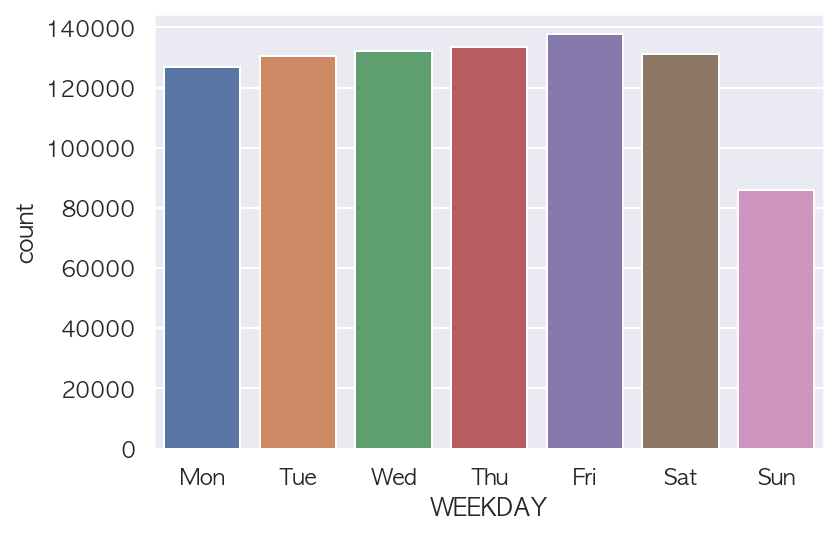

In [10]:
# 요일별 data건수 분포 시각화
sns.countplot(data=df_db_v2, x="WEEKDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]);

- 월요일부터 금요일까지는 점차 이용량이 증가하는 추세이며, 토요일에 소폭 감소 후 일요일에는 현저히 적은 이용량을 나타내었다.

#### 2. 특정 Feature 기준 분류 후,  결제 일자별, 요일별 이용량 추이 분석 -> D_TYPE 기준 분류 

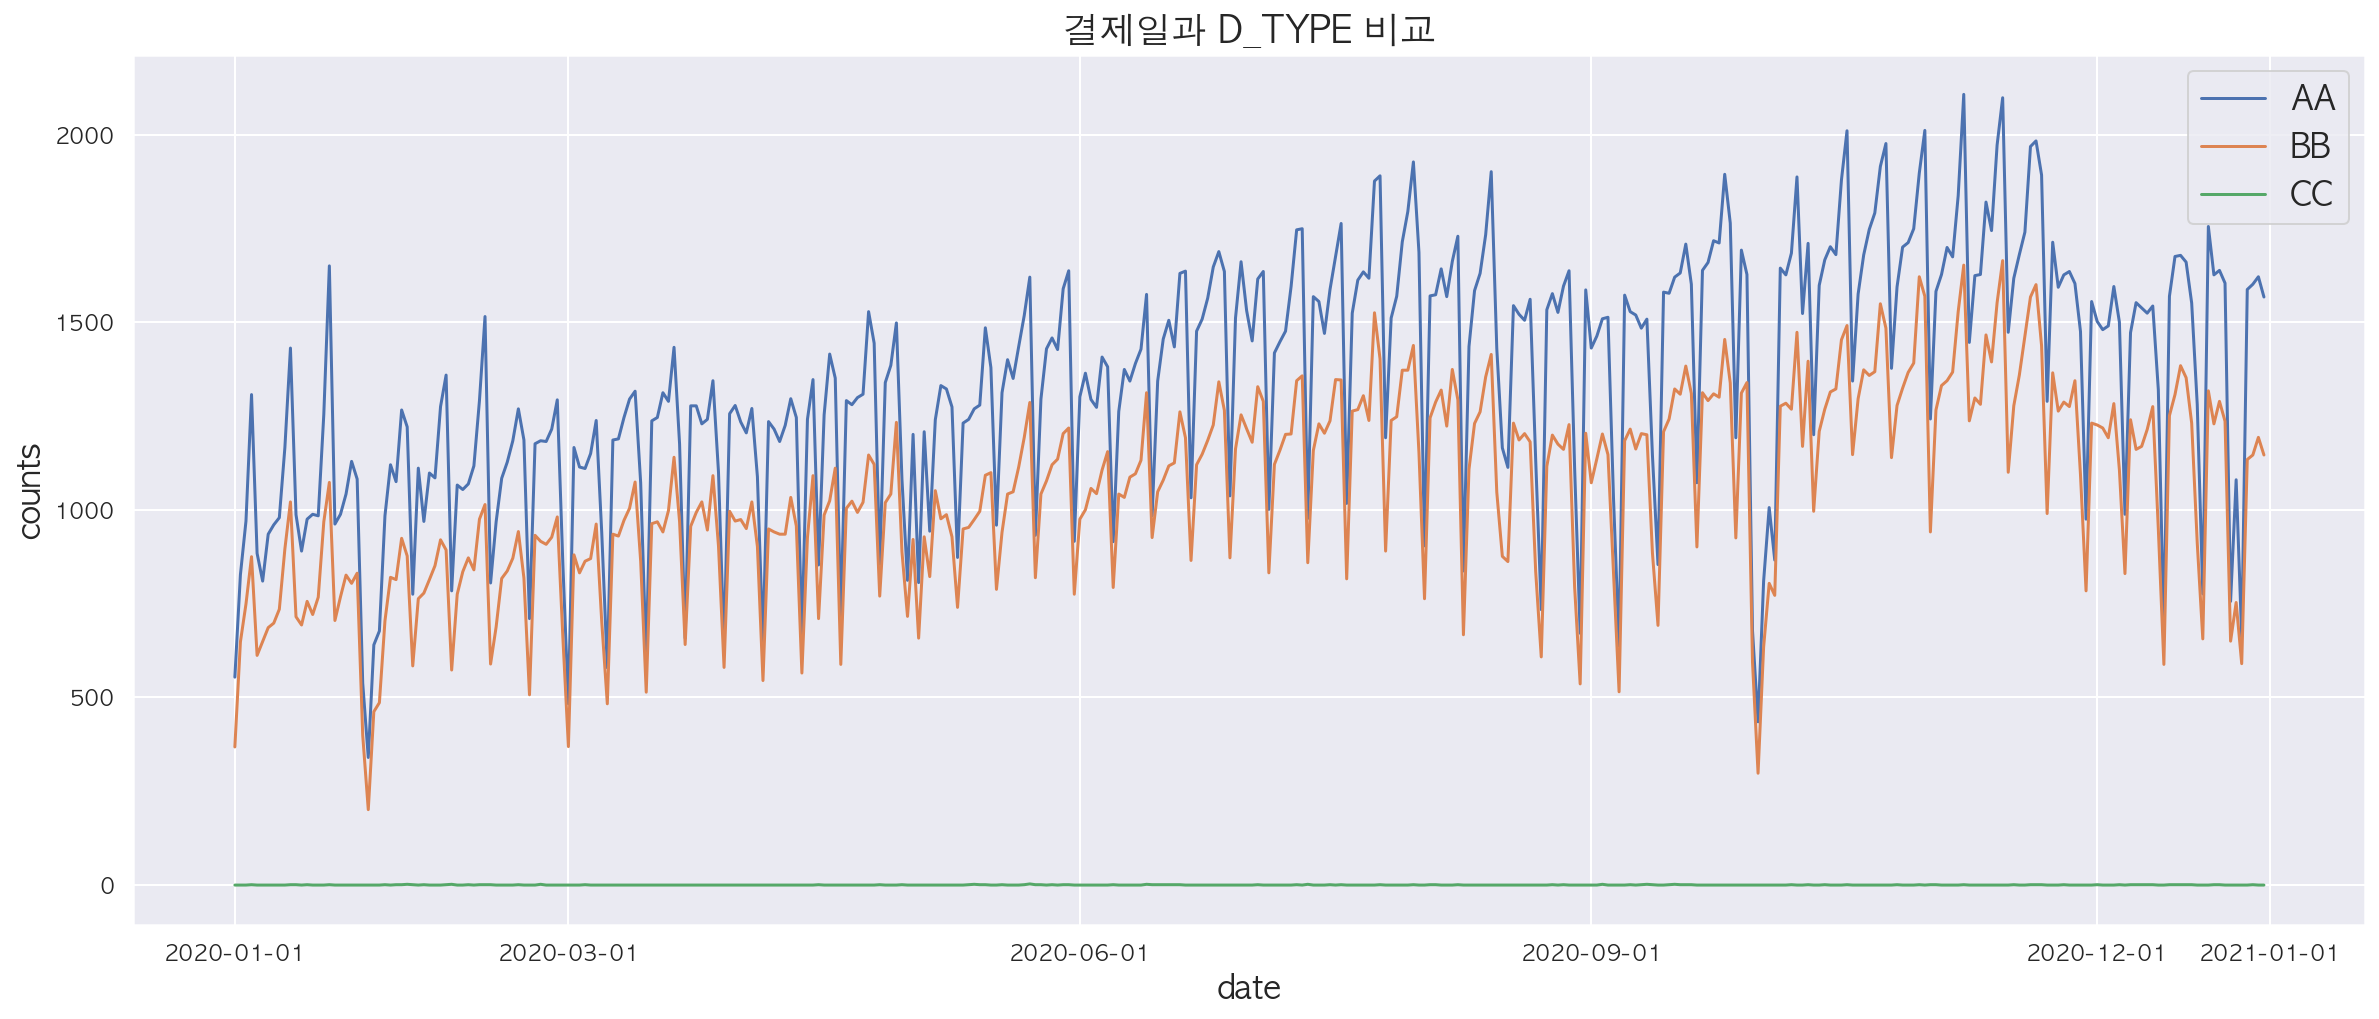

In [11]:
# D_TYPE 별 결제일 시각화
paybydtype = df_db_v2.groupby(['DATE', 'D_TYPE']).size().unstack(fill_value=0)

plt.figure(figsize=(20,8))
sns.lineplot(paybydtype.index, paybydtype['AA'])
sns.lineplot(paybydtype.index, paybydtype['BB'])
sns.lineplot(paybydtype.index, paybydtype['CC'])

plt.legend(['AA', 'BB', 'CC'], loc='best', fontsize=16)
plt.title('결제일과 D_TYPE 비교', fontsize=18)
plt.ylabel('counts', fontsize=16)
plt.xlabel('date', fontsize=16)
plt.xticks(ticks = ['2020-01-01', '2020-03-01', '2020-06-01', '2020-09-01', '2020-12-01', '2021-01-01'])
plt.show()

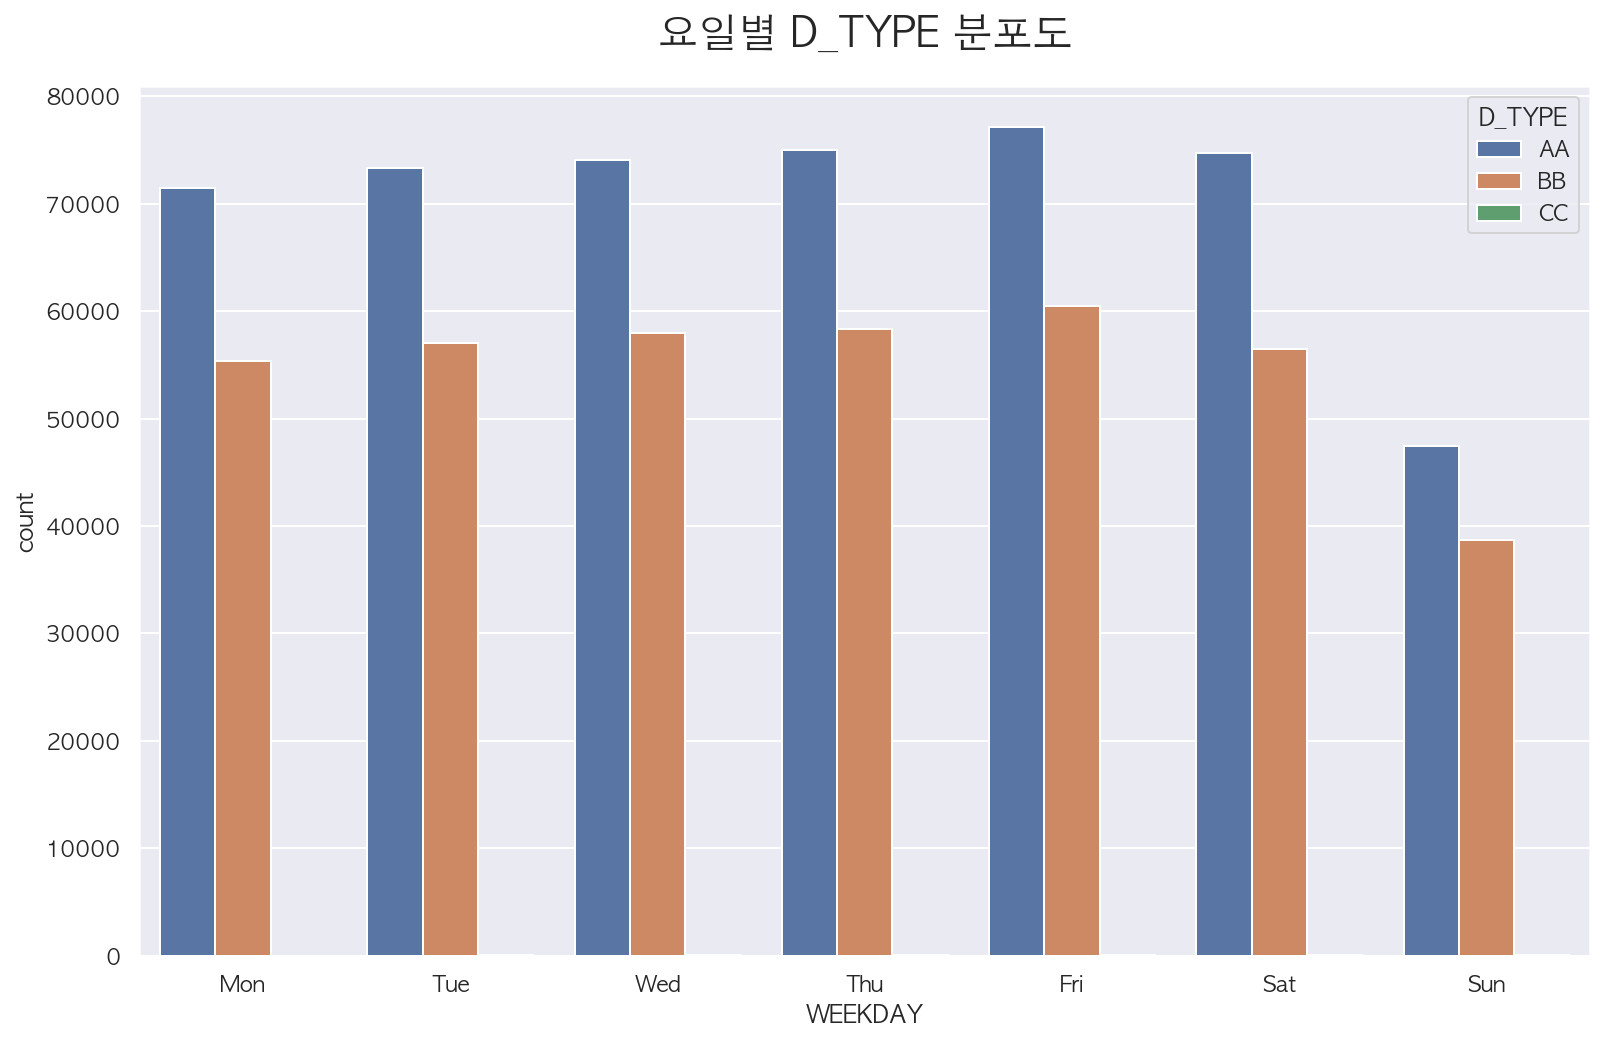

In [12]:
# 요일별 D_TYPE
plt.figure(figsize=(13,8))
plt.title("요일별 D_TYPE 분포도", fontsize=20, pad=20)
sns.countplot(data=df_db_v2, x="WEEKDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
              hue="D_TYPE", hue_order=["AA", "BB", "CC"]);

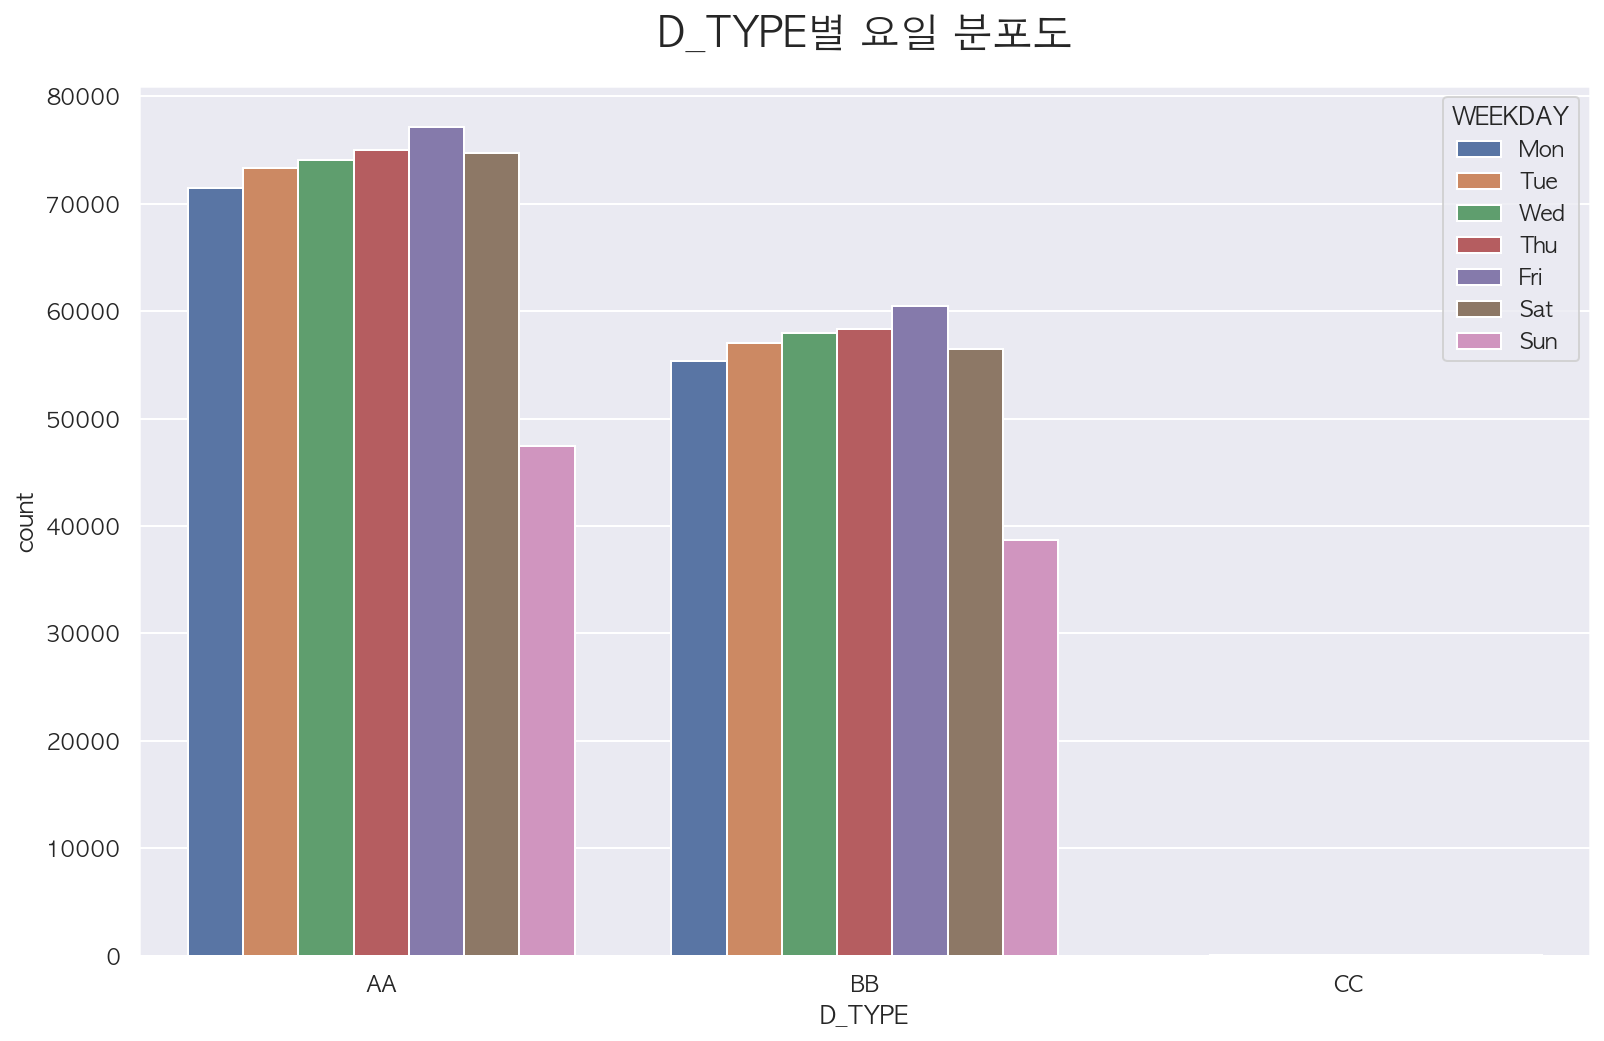

In [13]:
plt.figure(figsize=(13,8))
plt.title("D_TYPE별 요일 분포도", fontsize=20, pad=20)
sns.countplot(data=df_db_v2, x="D_TYPE", order=["AA", "BB", "CC"],
              hue="WEEKDAY", hue_order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]);

- 대다수 비중을 차지하고 있는 A와 B를 기준으로 비교했을 때, 두 그룹간 의미있는 차이는 관찰되지 않는다.

#### 3. 특정 Feature 기준 분류 후, 결제 일자별, 요일별 이용량 추이 분석 -> GOODS_TYPE 기준 분류 

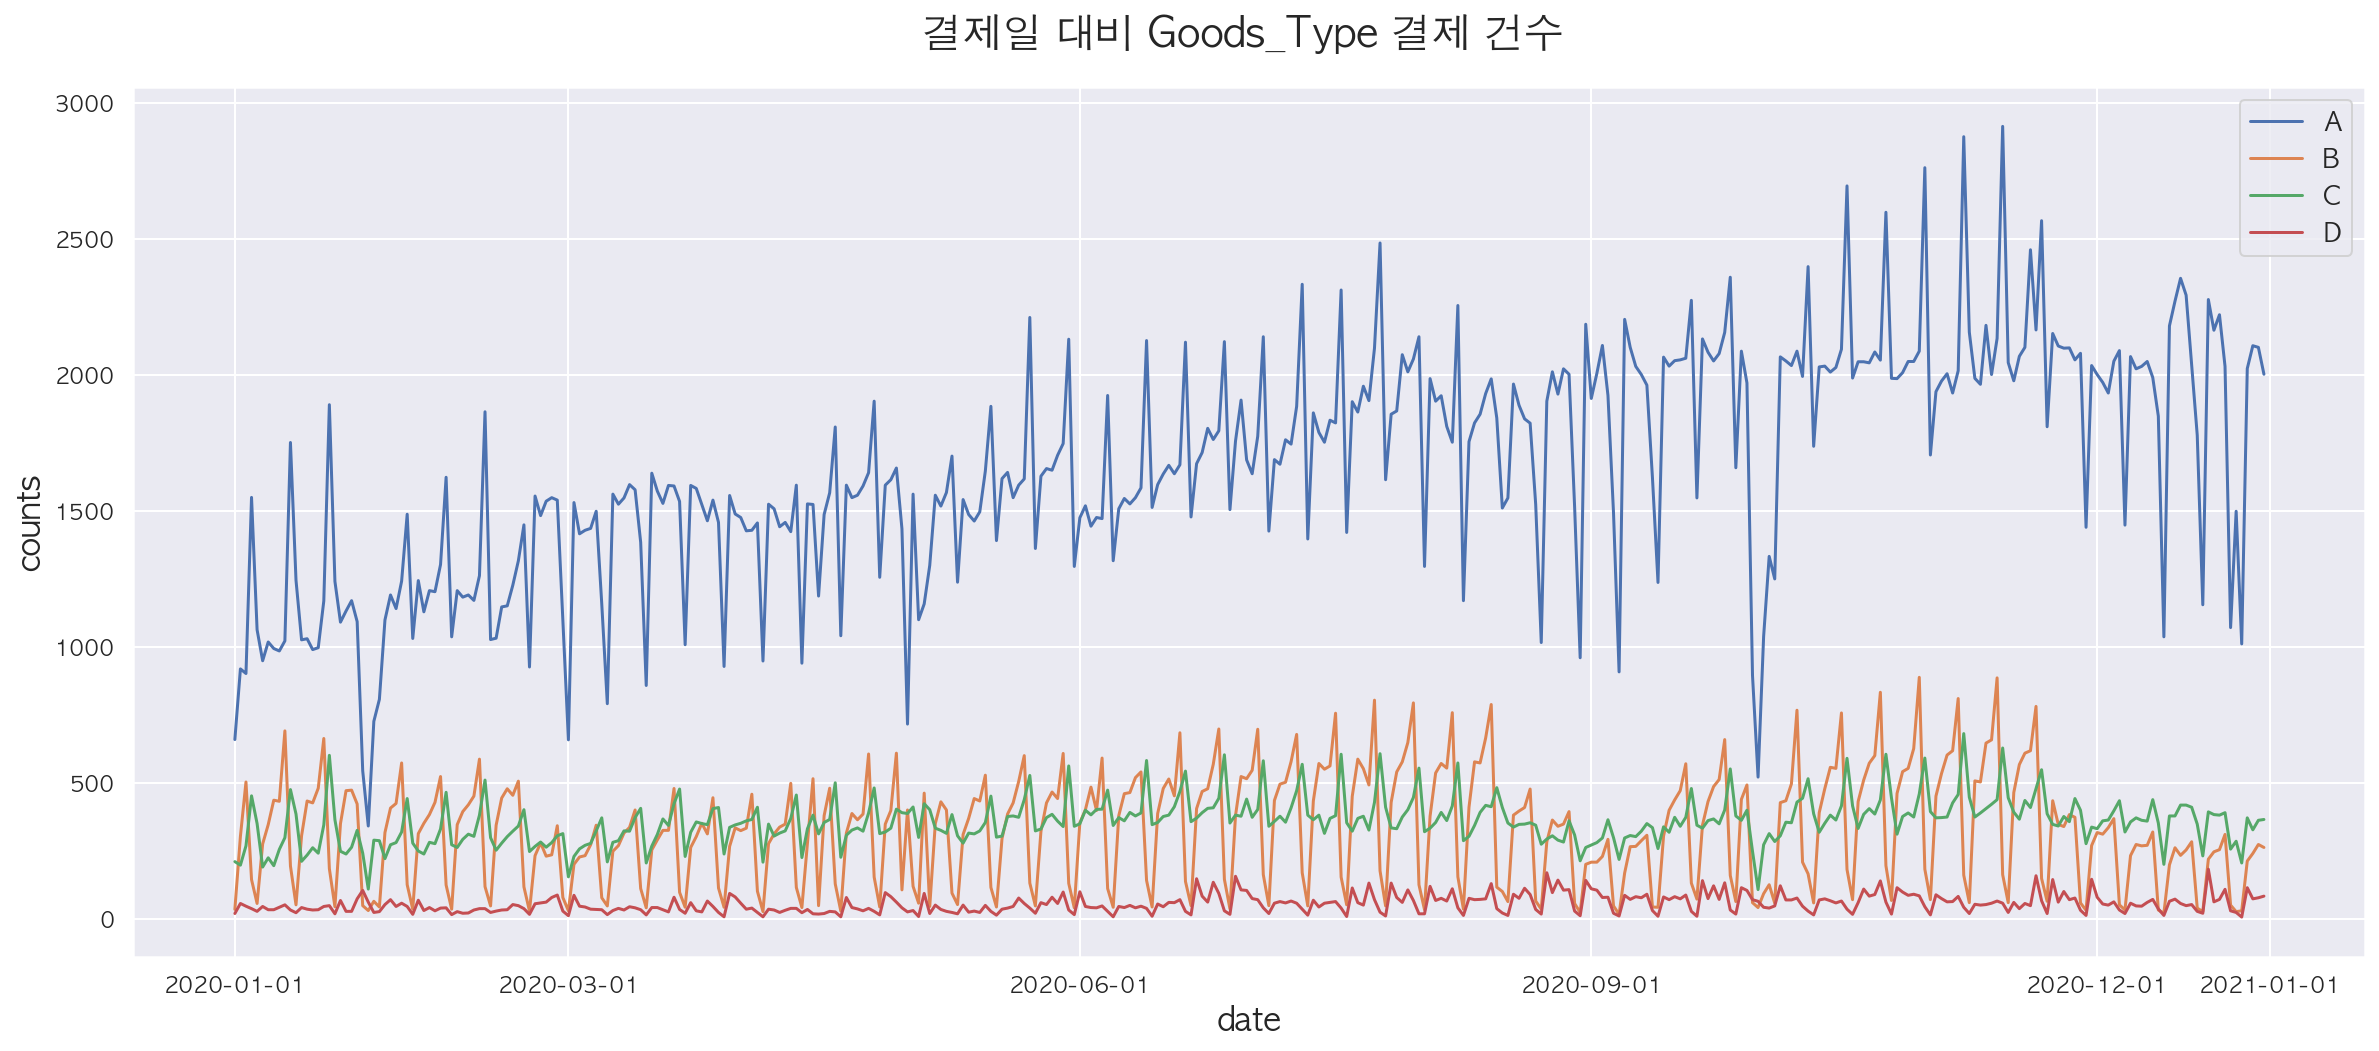

In [14]:
countbydate = df_db_v2.groupby(['DATE', 'GOODS_TYPE']).size().unstack(fill_value=0)

plt.figure(figsize=(20,8))
sns.lineplot(countbydate.index, countbydate['A'])
sns.lineplot(countbydate.index, countbydate['B'])
sns.lineplot(countbydate.index, countbydate['C'])
sns.lineplot(countbydate.index, countbydate['D'])

plt.legend(['A', 'B', 'C', 'D'], loc='best', fontsize=13)
plt.title('결제일 대비 Goods_Type 결제 건수 ', fontsize=20, pad=20)
plt.ylabel('counts', fontsize=16)
plt.xlabel('date', fontsize=16)
plt.xticks(ticks = ['2020-01-01', '2020-03-01', '2020-06-01', '2020-09-01', '2020-12-01', '2021-01-01'])
plt.show()

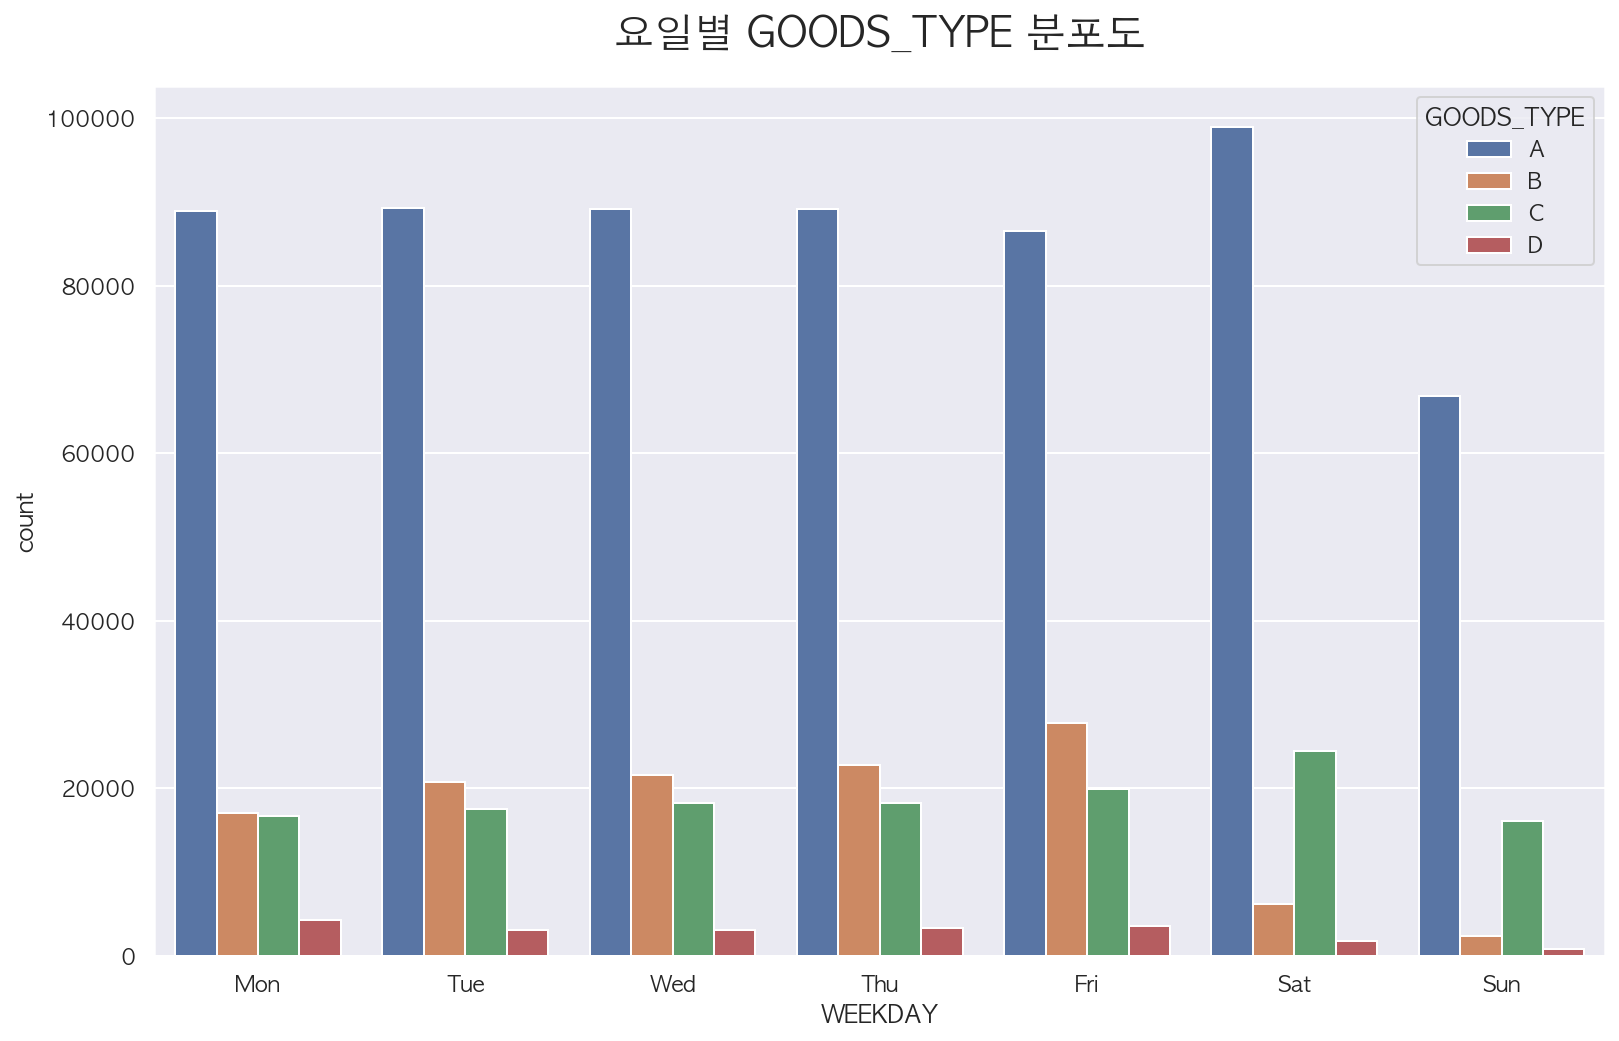

In [15]:
plt.figure(figsize=(13,8))
plt.title("요일별 GOODS_TYPE 분포도", fontsize=20, pad=20)
sns.countplot(data=df_db_v2, x="WEEKDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
              hue="GOODS_TYPE", hue_order=["A", "B", "C", "D"]);

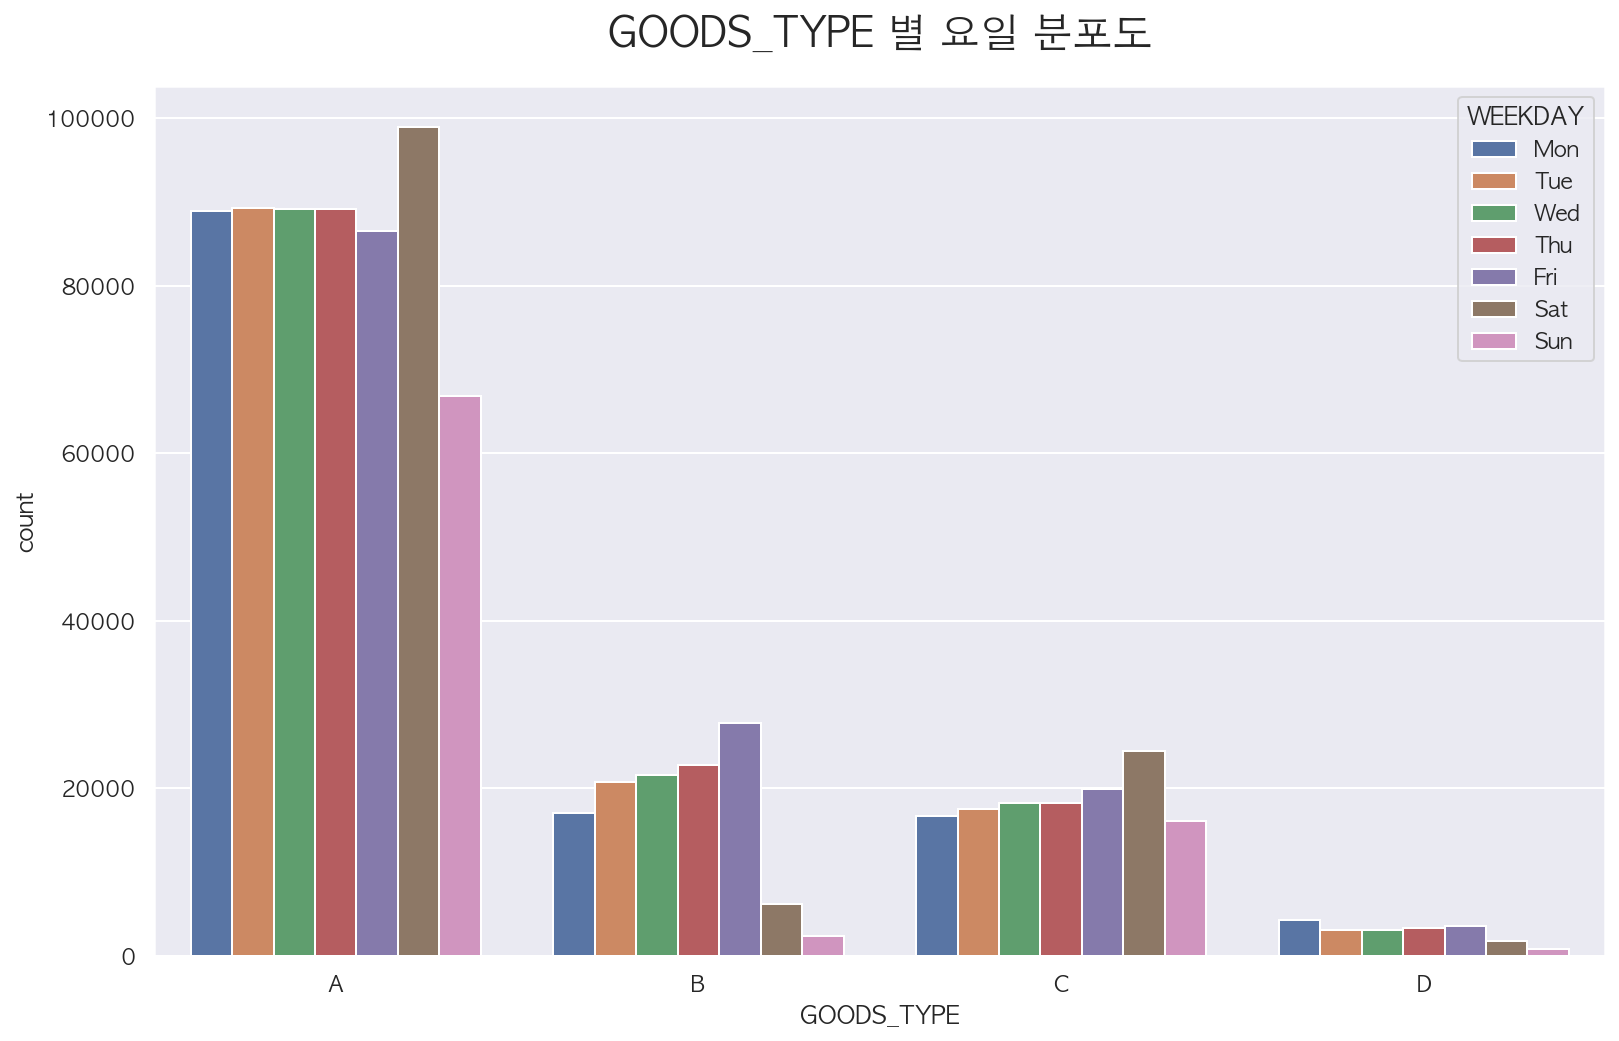

In [16]:
plt.figure(figsize=(13,8))
plt.title("GOODS_TYPE 별 요일 분포도", fontsize=20, pad=20)
sns.countplot(data=df_db_v2, x="GOODS_TYPE", order=["A", "B", "C", "D", ],
              hue="WEEKDAY", hue_order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]);

- 금요일과 토요일을 중심으로 A와 B TYPE간 서로 다른 이용행태가 나타남을 확인함.
- A TYPE의 경우, 금요일에는 이용량이 소폭 감소하고 토요일에 이용량이 상당히 증가하는 추세를 보임.
- 반면 B TYPE의 경우, 금요일까지 꾸준히 이용량이 상승한 후 토요일에 큰 폭으로 감소하는 추세를 보임.

#### 4. 특정 Feature 기준 분류 후, 요일별 이용량 추이 분석 -> 이용(결제)월 기준 분류 

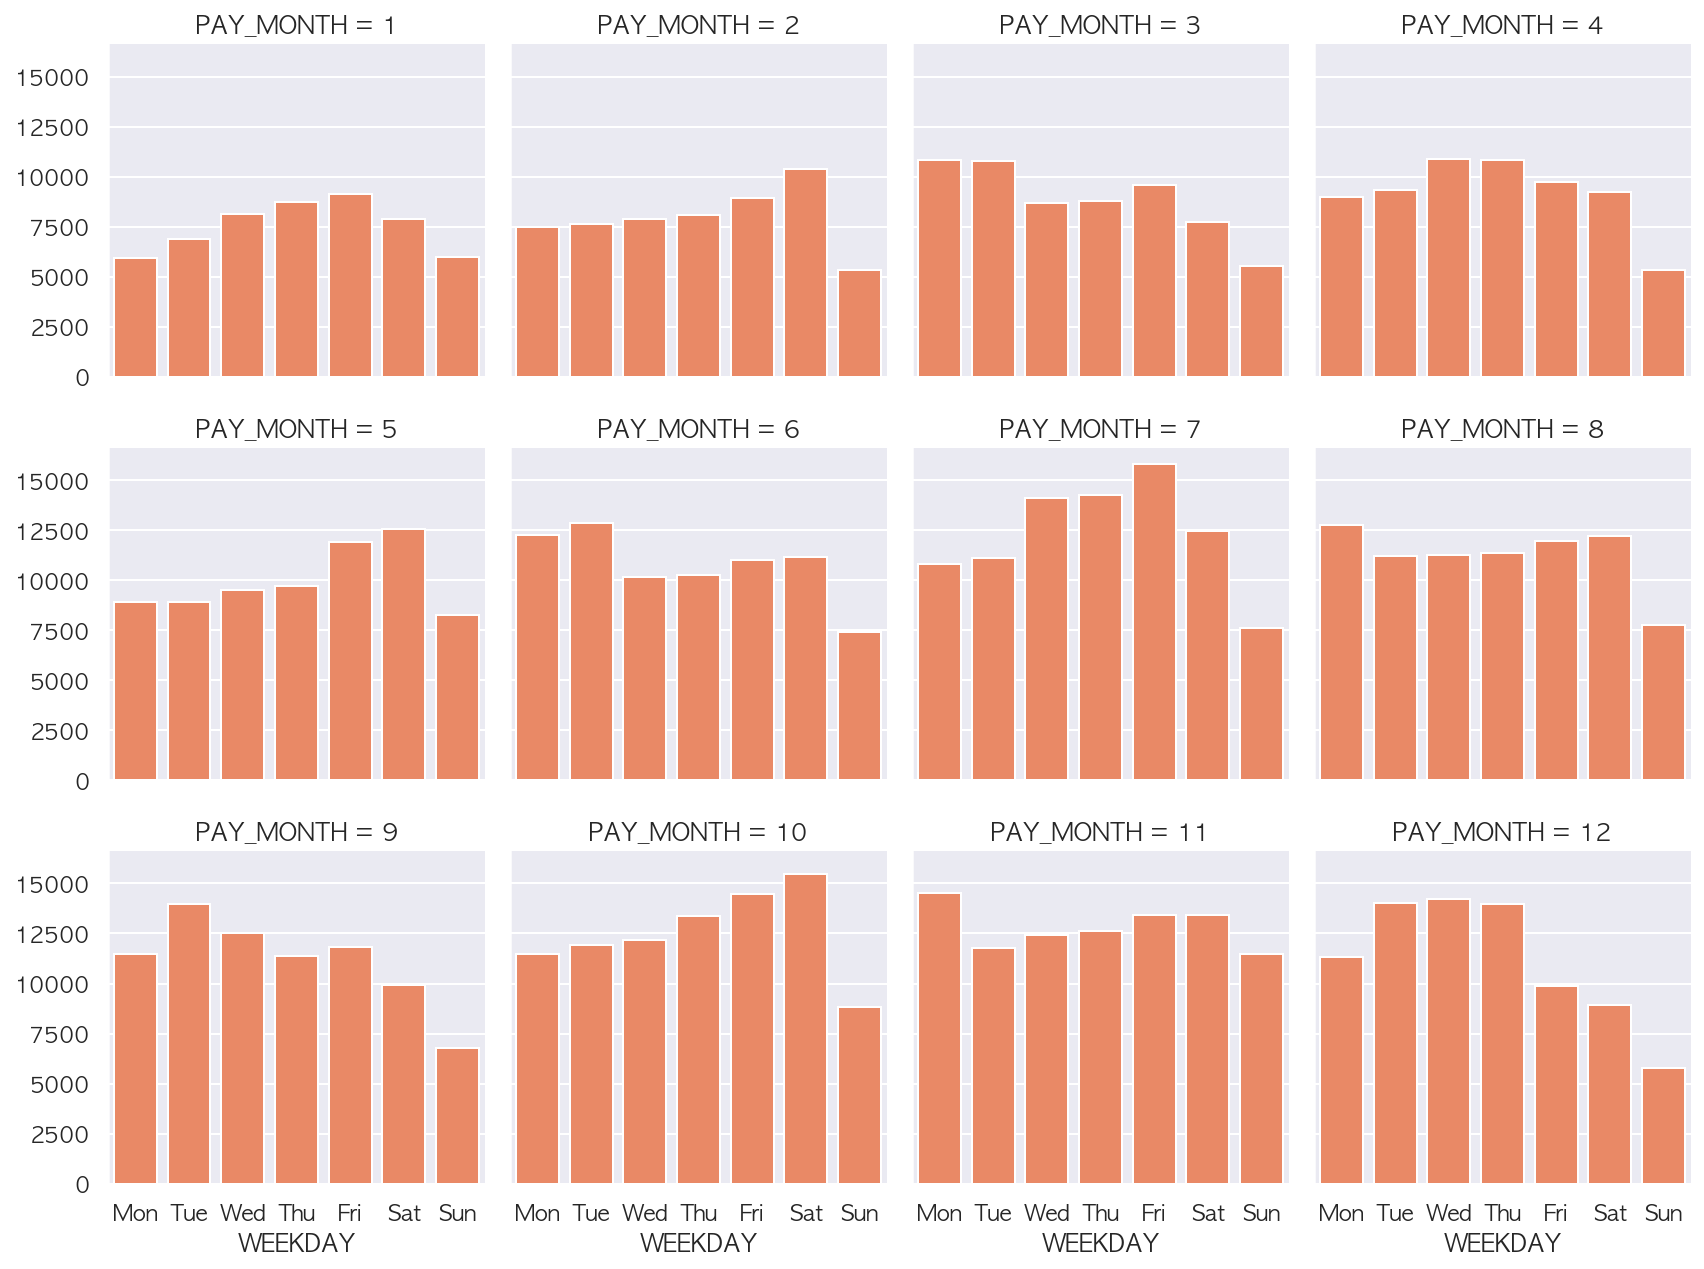

In [17]:
g = sns.FacetGrid(df_db_v2, col="PAY_MONTH", col_wrap=4)  # 한 줄에 4개씩 출력하도록 설정
g.map(sns.countplot, "WEEKDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], color="coral");

- 월별로 이용행태가 서로 다르게 나타난다는 것을 확인 가능.
- 주요 특징을 전체적으로 살펴보자면,
    1. 토요일 이용량이 유독 많은 달(2월, 5월, 10월)이 있는가 하면, 주 초반(월, 화) 이용량이 많은 달(3월, 6월, 9월)도 확인됨
    2. 금요일 이용량이 유독 많은 달(1월, 7월)이 있는 반면, 평일 중 금요일 이용량이 유독 적은 달(12월)도 존재함.

#### 5. 특정 Feature 기준 분류 후, 요일별 이용량 추이 분석 ->  월별/"GOODS_TYPE"별 기준 복합 적용

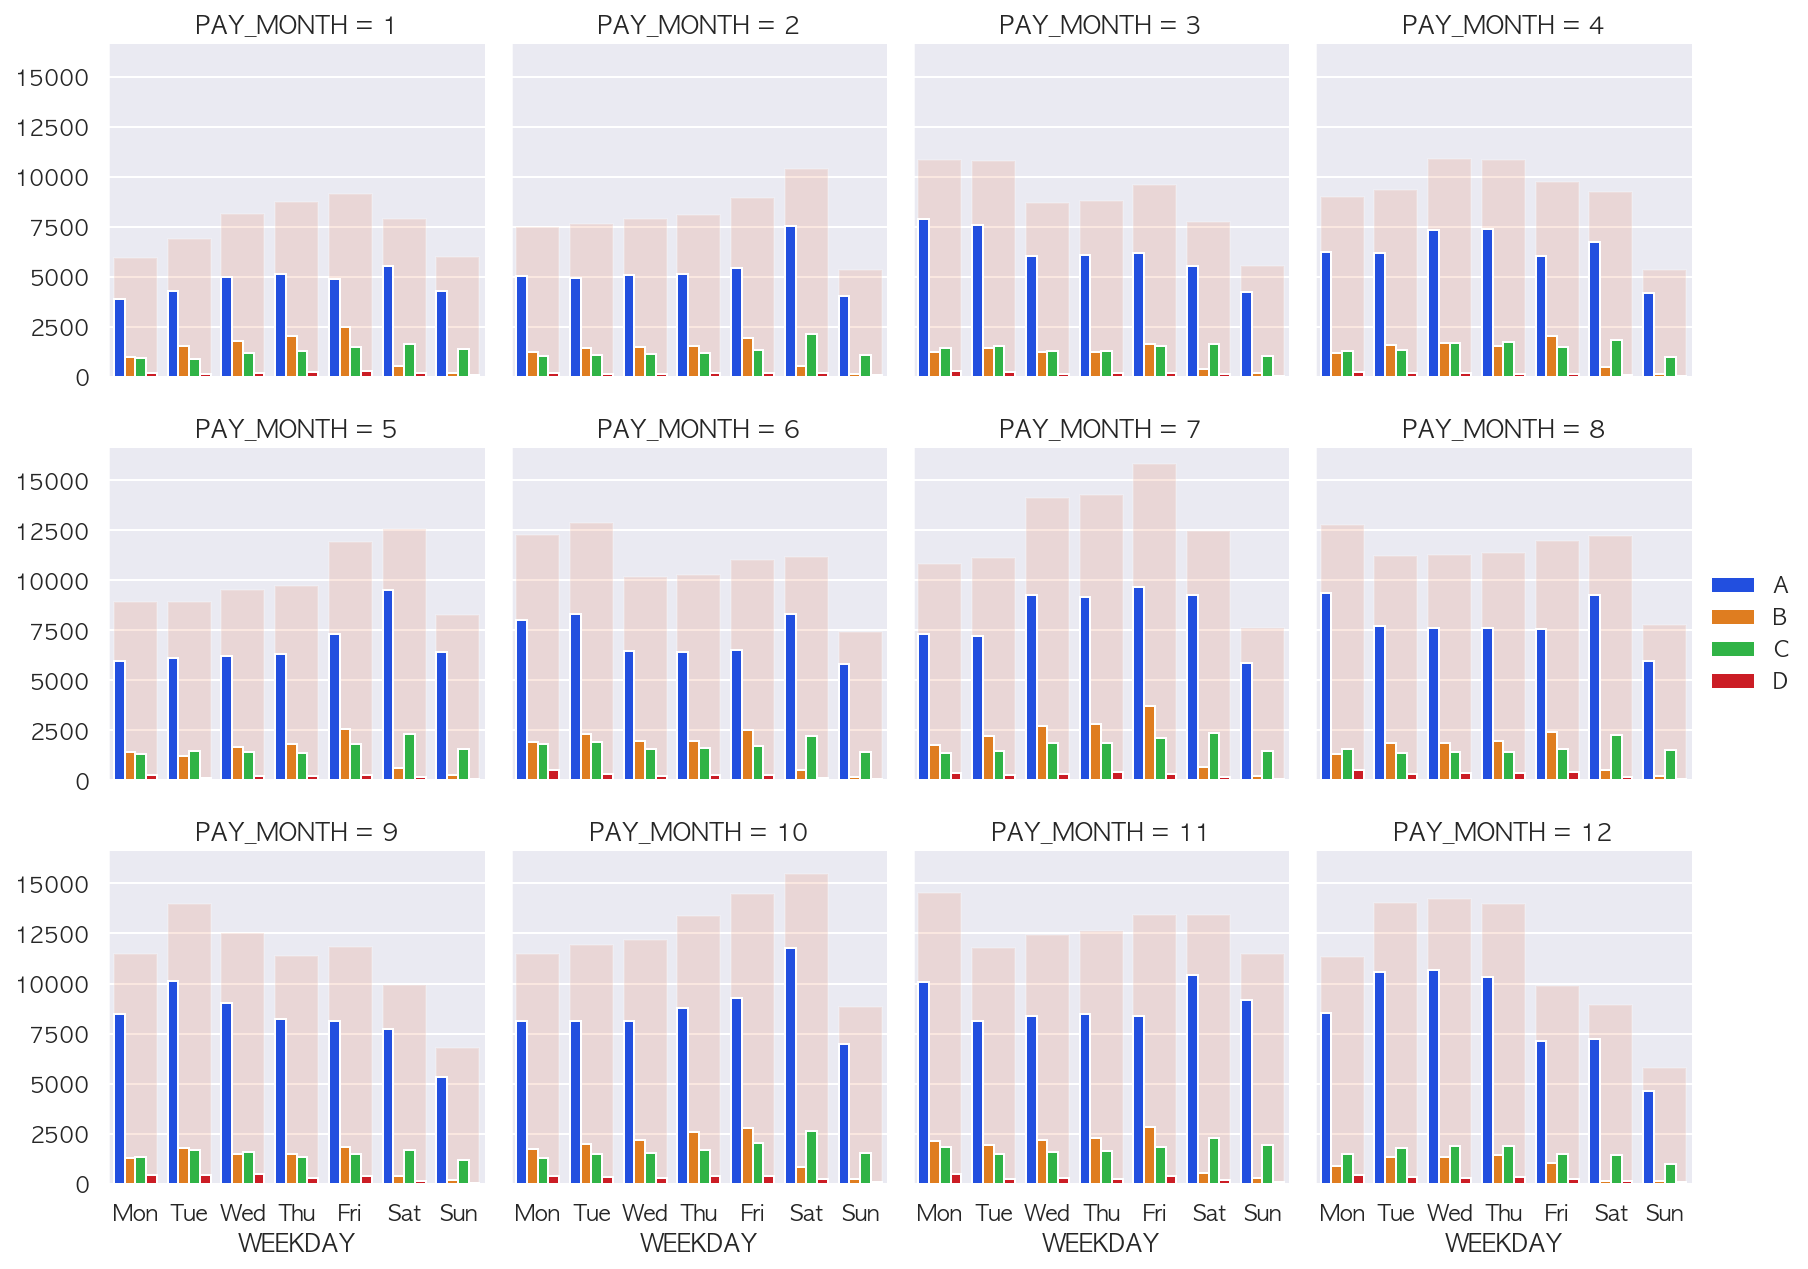

In [18]:
g = sns.FacetGrid(df_db_v2, col="PAY_MONTH", col_wrap=4)  # 한 줄에 4개씩 출력하도록 설정

# 월별 전체 추이 그래프 겹쳐 그리기 => 참조용
g.map(sns.countplot, "WEEKDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
      alpha=0.2, color="coral")  # 투명도 및 색상 적용

# "GOODS_TYPE"별로 구분한 그래프 그리기
g.map(sns.countplot, "WEEKDAY", order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
      hue=df_db_v2["GOODS_TYPE"], hue_order=["A", "B", "C", "D"], palette="bright")

g.add_legend();

- 전체적으로 비중이 가장 큰 A가 갖는 특징이 월별 특징과 비슷하게 나타나는 가운데, 1월/7월/11월의 금요일 이용량에 대해서는 A보다 B의 영향력이 상대적으로 더 큰 경향이 나타났다.

#### 6. 날짜(day)별 이용량 추이 분석 

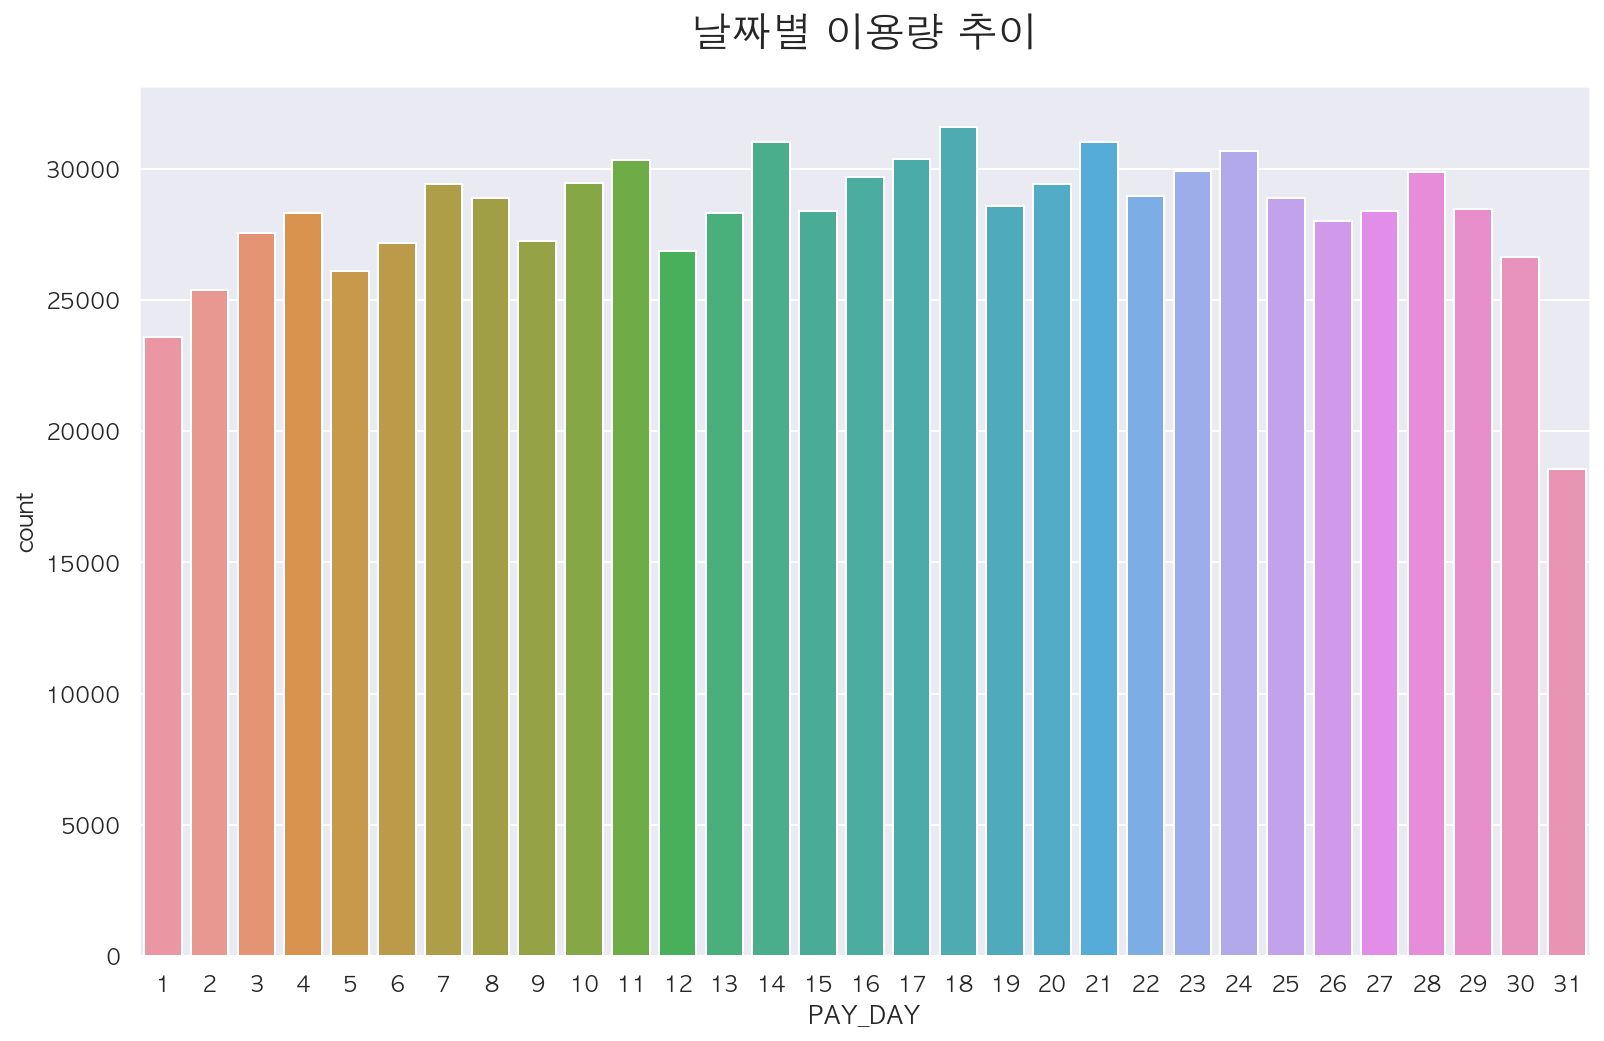

In [19]:
# 날짜(day)별 data건수 분포 시각화
plt.figure(figsize=(13,8))
plt.title("날짜별 이용량 추이", fontsize=20, pad=20)
sns.countplot(data=df_db_v2, x="PAY_DAY");

- 3~4일 단위의 패턴이 부분적으로 관찰되며, 대체적으로 후반부로 갈수록 이용량이 소폭 증가하는 경향을 보임
- 31일이 유독 적은 이유는 월별로 31일이 없는 달도 있기 때문인 것으로 판단됨

### 정리 
- 요일에 따른 이용량 변화는 물론이고, 월별, 날짜별, "GOODS_TYPE"별로도 이용량이 서로 다른 특성을 보임을 확인되었다.
- 다만, 현재 주어진 예측모델 적용 기준상 Traing 데이터(1-9월 기준)와 Test 데이터(10-12월 기준)의 기준월이 상이하므로, 예측모델 적용 시 "월" Feature는 제외시키기로 함

## 5. 모델링 구축 및 검증 
#### 기존 Feature별 적용여부 판단 (지금까지 분석한 내용 기준)
1. **JOIN_DATE** -> 유저 가입일 : 유저별 1개씩 존재하는 가입일 정보로 **USER_ID**대비 추가 변별력이 없어보임 - 적용 보류
2. **D_TYPE** -> 회원 등급(추정): 유저별 1개씩 존재하는 값으로 **USER_ID**대비 추가로 변별력이 없어보임 - 적용 보류
3. **STORE_ID** -> 등록 주차장 ID: 유저가 이용한 점포의 고유 id로 변별력 있어보임 - **적용**
4. **GOODS_TYPE** -> 주차권 타입(추정): 각 TYPE별로 이용행태가 다르게 나타나므로 변별력이 있어보임 - **적용**
5. **DATE** -> 날짜별로 이용 행태가 다르게 나타나므로 변별력 있어 보임 - **적용** / 단, 연도 및 월을 제외한 **이용(결제)일("DATE_D")** 기준으로 적용
6. **AD1** -> 점포id별로 1개씩 존재하는 주소값으로 **STORE_ID** 대비 추가로 변별력이 없어 보임 - 적용 보류
6. 추가적용 Feature: **WEEKDAY** -> **DATE**에서 추출한 요일 정보로 요일별 특성 반영이 필요해 보임.

### -> "STORE_ID", "GODDS_TYPE", "DATE", "WEEKDAY"를 기준으로 예측 모델 적용 

#### 예측 모델 적용 관련 조건 및 가이드 
- 초기 랜덤 시드 설정 => np.random.seed(42)
- 데이터 구성 가이드
    1. Training Data => 2020.01.01 ~ 2020.09.30
    2. Test Data => 2020.10.01 ~ 2020.12.31

In [20]:
# 랜덤 시드값 설정
np.random.seed(42)

In [21]:
# 예측모델 적용을 위한 현재 기준 data 별도 저장
raw_data = df_db_v2.copy()

In [22]:
# 범주형 정보 Encoding 준비 => LabelEncoder 및 OneHotEncoding 활용
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

### 5-1. GOODS_TYPE 정보에 대한 Label Encoding 적용 후 예측 수행 & 성능 측정

In [23]:
# LabelEncoding용 raw_data 별도 저장
raw_data_v1 = raw_data.copy()

# 요일 정보 LabelEncoding
raw_data_v1["WEEKDAY"] = label_encoder.fit_transform(raw_data_v1["WEEKDAY"])

# GOODS_TYPE 정보 LabelEncoding
raw_data_v1["GOODS_TYPE"] = label_encoder.fit_transform(raw_data_v1["GOODS_TYPE"])

raw_data_v1  # 결과 확인

,USER_ID,JOIN_DATE,JOIN_YEAR,JOIN_MONTH,JOIN_DAY,D_TYPE,STORE_ID,GOODS_TYPE,DATE,PAY_YEAR,PAY_MONTH,PAY_DAY,WEEKDAY,COUNT,AD1
0,2858,2014-01-07,2014,1,7,AA,1892,0,2020-01-01,2020,1,1,6,1,GN
1,5647,2014-02-14,2014,2,14,BB,182009,0,2020-01-01,2020,1,1,6,1,J
2,33314,2014-11-20,2014,11,20,BB,82431,0,2020-01-01,2020,1,1,6,1,SC
3,37001,2014-12-04,2014,12,4,BB,725,2,2020-01-01,2020,1,1,6,1,MP
4,37819,2014-12-07,2014,12,7,AA,220691,2,2020-01-01,2020,1,1,6,1,JRR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,2020,12,31,BB,219886,1,2020-12-31,2020,12,31,4,1,GN
879267,1830570,2020-12-31,2020,12,31,BB,82433,1,2020-12-31,2020,12,31,4,1,CY
879268,1830580,2020-12-31,2020,12,31,AA,92020,1,2020-12-31,2020,12,31,4,1,JRR
879269,1830589,2020-12-31,2020,12,31,BB,92437,1,2020-12-31,2020,12,31,4,1,J


In [24]:
# 예측모델 적용 관련 필요한 Feature만 추출
raw_data_v1 = raw_data_v1[["USER_ID", "PAY_DAY", "STORE_ID",
                           "WEEKDAY",  # 요일 관련 Column
                           "GOODS_TYPE",  # GOODS_TYPE 관련 Column
                           "COUNT",
                           "DATE"]]  # 날짜 기준으로 data 분리하기 위해 함께 추출
raw_data_v1

,USER_ID,PAY_DAY,STORE_ID,WEEKDAY,GOODS_TYPE,COUNT,DATE
0,2858,1,1892,6,0,1,2020-01-01
1,5647,1,182009,6,0,1,2020-01-01
2,33314,1,82431,6,0,1,2020-01-01
3,37001,1,725,6,2,1,2020-01-01
4,37819,1,220691,6,2,1,2020-01-01
...,...,...,...,...,...,...,...
879266,1830551,31,219886,4,1,1,2020-12-31
879267,1830570,31,82433,4,1,1,2020-12-31
879268,1830580,31,92020,4,1,1,2020-12-31
879269,1830589,31,92437,4,1,1,2020-12-31


In [25]:
# 정해진 가이드 기준 Training, Test 데이터 분리
training_v1 = raw_data_v1.query("DATE >= '2020-01-01' and DATE <= '2020-09-30'")
test_v1 = raw_data_v1.query("DATE >= '2020-10-01' and DATE <= '2020-12-31'")

# Training, Test 데이터 준비
# USER_ID 외에 요일, 일, GOODS_TYPE, STORE_ID 적용
x_train = training_v1[["USER_ID", "PAY_DAY", "STORE_ID",
                      "WEEKDAY",  # 요일 관련 Column
                      "GOODS_TYPE"]]  # GOODS_TYPE 관련 Column
x_test = test_v1[["USER_ID", "PAY_DAY", "STORE_ID",
                      "WEEKDAY",  # 요일 관련 Column
                      "GOODS_TYPE"]]  # GOODS_TYPE 관련 Column
y_train = training_v1[["COUNT"]]
y_test = test_v1[["COUNT"]]

In [26]:
# x_train 데이터프레임 형태 확인
x_train

,USER_ID,PAY_DAY,STORE_ID,WEEKDAY,GOODS_TYPE
0,2858,1,1892,6,0
1,5647,1,182009,6,0
2,33314,1,82431,6,0
3,37001,1,725,6,2
4,37819,1,220691,6,2
...,...,...,...,...,...
623574,1709914,30,221022,6,1
623575,1709935,30,725,6,1
623576,1709942,30,223058,6,1
623577,1709950,30,182320,6,0


In [27]:
# 랜덤포레스트 모델 선언
RF = RandomForestRegressor()

# 랜덤포레스트 모델 학습
RF.fit(x_train, y_train)

# Test 데이터에 대한 예측 수행
predicted = RF.predict(x_test)

# MSE 및 MAE 측정
MSE = mean_squared_error(y_test, predicted)
MAE = mean_absolute_error(y_test, predicted)

In [28]:
print(f"MSE : {MSE}\nMAE : {MAE}")

MSE : 0.05445964257607843
MAE : 0.083495616109099


-> LabelEncoding 적용 후 예측 결과, MSE는 0.0545 수준, MAE는 0.0835수준으로 측정됨 확인

### 5-2. 요일과 GOODS_TYPE 정보에 대한 Label Encoding 적용 후 예측 수행 & 성능 측정

In [30]:
raw_data = pd.get_dummies(raw_data, columns=['WEEKDAY', 'GOODS_TYPE'])
raw_data

,USER_ID,JOIN_DATE,JOIN_YEAR,JOIN_MONTH,JOIN_DAY,D_TYPE,STORE_ID,DATE,PAY_YEAR,PAY_MONTH,...,WEEKDAY_Mon,WEEKDAY_Sat,WEEKDAY_Sun,WEEKDAY_Thu,WEEKDAY_Tue,WEEKDAY_Wed,GOODS_TYPE_A,GOODS_TYPE_B,GOODS_TYPE_C,GOODS_TYPE_D
0,2858,2014-01-07,2014,1,7,AA,1892,2020-01-01,2020,1,...,0,0,0,0,0,1,1,0,0,0
1,5647,2014-02-14,2014,2,14,BB,182009,2020-01-01,2020,1,...,0,0,0,0,0,1,1,0,0,0
2,33314,2014-11-20,2014,11,20,BB,82431,2020-01-01,2020,1,...,0,0,0,0,0,1,1,0,0,0
3,37001,2014-12-04,2014,12,4,BB,725,2020-01-01,2020,1,...,0,0,0,0,0,1,0,0,1,0
4,37819,2014-12-07,2014,12,7,AA,220691,2020-01-01,2020,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,2020,12,31,BB,219886,2020-12-31,2020,12,...,0,0,0,1,0,0,0,1,0,0
879267,1830570,2020-12-31,2020,12,31,BB,82433,2020-12-31,2020,12,...,0,0,0,1,0,0,0,1,0,0
879268,1830580,2020-12-31,2020,12,31,AA,92020,2020-12-31,2020,12,...,0,0,0,1,0,0,0,1,0,0
879269,1830589,2020-12-31,2020,12,31,BB,92437,2020-12-31,2020,12,...,0,0,0,1,0,0,0,1,0,0


In [32]:
# 예측모델 적용 관련 필요한 Feature만 추출
raw_data = raw_data[["USER_ID", "PAY_DAY", "STORE_ID",
                           "WEEKDAY_Mon", "WEEKDAY_Tue", "WEEKDAY_Wed", "WEEKDAY_Thu", "WEEKDAY_Fri", "WEEKDAY_Sat", "WEEKDAY_Sun",  # 요일 관련 Column
                           "GOODS_TYPE_A", "GOODS_TYPE_B", "GOODS_TYPE_C", "GOODS_TYPE_D",  # GOODS_TYPE 관련 Column
                           "COUNT",
                           "DATE"]]  # 날짜 기준으로 data 분리하기 위해 함께 추출
raw_data

,USER_ID,PAY_DAY,STORE_ID,WEEKDAY_Mon,WEEKDAY_Tue,WEEKDAY_Wed,WEEKDAY_Thu,WEEKDAY_Fri,WEEKDAY_Sat,WEEKDAY_Sun,GOODS_TYPE_A,GOODS_TYPE_B,GOODS_TYPE_C,GOODS_TYPE_D,COUNT,DATE
0,2858,1,1892,0,0,1,0,0,0,0,1,0,0,0,1,2020-01-01
1,5647,1,182009,0,0,1,0,0,0,0,1,0,0,0,1,2020-01-01
2,33314,1,82431,0,0,1,0,0,0,0,1,0,0,0,1,2020-01-01
3,37001,1,725,0,0,1,0,0,0,0,0,0,1,0,1,2020-01-01
4,37819,1,220691,0,0,1,0,0,0,0,0,0,1,0,1,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,31,219886,0,0,0,1,0,0,0,0,1,0,0,1,2020-12-31
879267,1830570,31,82433,0,0,0,1,0,0,0,0,1,0,0,1,2020-12-31
879268,1830580,31,92020,0,0,0,1,0,0,0,0,1,0,0,1,2020-12-31
879269,1830589,31,92437,0,0,0,1,0,0,0,0,1,0,0,1,2020-12-31


In [33]:
# 정해진 가이드 기준 Training, Test 데이터 분리
training_v1 = raw_data.query("DATE >= '2020-01-01' and DATE <= '2020-09-30'")
test_v1 = raw_data.query("DATE >= '2020-10-01' and DATE <= '2020-12-31'")

# Training, Test 데이터 준비
# USER_ID 외에 요일, 일, GOODS_TYPE, STORE_ID 적용
x_train = training_v1[["USER_ID", "PAY_DAY", "STORE_ID",
                      "WEEKDAY_Mon", "WEEKDAY_Tue", "WEEKDAY_Wed", "WEEKDAY_Thu", "WEEKDAY_Fri", "WEEKDAY_Sat", "WEEKDAY_Sun",  # 요일 관련 Column
                           "GOODS_TYPE_A", "GOODS_TYPE_B", "GOODS_TYPE_C", "GOODS_TYPE_D",]]  # GOODS_TYPE 관련 Column
x_test = test_v1[["USER_ID", "PAY_DAY", "STORE_ID",
                      "WEEKDAY_Mon", "WEEKDAY_Tue", "WEEKDAY_Wed", "WEEKDAY_Thu", "WEEKDAY_Fri", "WEEKDAY_Sat", "WEEKDAY_Sun",  # 요일 관련 Column
                           "GOODS_TYPE_A", "GOODS_TYPE_B", "GOODS_TYPE_C", "GOODS_TYPE_D",]]  # GOODS_TYPE 관련 Column
y_train = training_v1[["COUNT"]]
y_test = test_v1[["COUNT"]]

In [34]:
# x_train 데이터프레임 형태 확인
x_train

,USER_ID,PAY_DAY,STORE_ID,WEEKDAY_Mon,WEEKDAY_Tue,WEEKDAY_Wed,WEEKDAY_Thu,WEEKDAY_Fri,WEEKDAY_Sat,WEEKDAY_Sun,GOODS_TYPE_A,GOODS_TYPE_B,GOODS_TYPE_C,GOODS_TYPE_D
0,2858,1,1892,0,0,1,0,0,0,0,1,0,0,0
1,5647,1,182009,0,0,1,0,0,0,0,1,0,0,0
2,33314,1,82431,0,0,1,0,0,0,0,1,0,0,0
3,37001,1,725,0,0,1,0,0,0,0,0,0,1,0
4,37819,1,220691,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623574,1709914,30,221022,0,0,1,0,0,0,0,0,1,0,0
623575,1709935,30,725,0,0,1,0,0,0,0,0,1,0,0
623576,1709942,30,223058,0,0,1,0,0,0,0,0,1,0,0
623577,1709950,30,182320,0,0,1,0,0,0,0,1,0,0,0


In [35]:
# 랜덤포레스트 모델 선언
RF = RandomForestRegressor()

# 랜덤포레스트 모델 학습
RF.fit(x_train, y_train)

# Test 데이터에 대한 예측 수행
predicted = RF.predict(x_test)

# MSE 및 MAE 측정
MSE = mean_squared_error(y_test, predicted)
MAE = mean_absolute_error(y_test, predicted)

In [36]:
print(f"MSE : {MSE}\nMAE : {MAE}")

MSE : 0.05644967512275858
MAE : 0.09009239898951775


- OneHotEncoding & Scaler & 가중치 적용 후 예측 결과, MSE는 0.0564, MAE는 0.0900 수준으로 측정됨 확인

### 정리
- Good_Type (주차권)을 기준으로 요일과 일자, 결제건수를 이용하여 모델링을 한 결과 MSE 점수와 MAE 점수가 높지 않음을 나타냈다.
- 다른 변수들을 이용하여 예측 모델을 만들면 되지 않을까 생각이 든다.

### 개선점 
- 외부데이터인 교통량 데이터를 대입하여 교통량과 관련이 있으면 모델링 구축 
- 기상데이터를 이용하여 역시 관련있는 데이터를 가지고 모델링 구축